In [17]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
data = pd.read_csv('s3://millionsongprocessed/data_B.tsv', sep='\t', header=None)

In [11]:
!pip install seaborn

     |████████████████████████████████| 283 kB 19.4 MB/s eta 0:00:01


In [18]:
data.columns =  ["artist familiarity", "artist hotttnesss", "artist id", "artist location", "artist mbtags", 
 "artist mbtags count", "artist name", "artist terms", "artist terms freq", "artist terms weight", 
 "danceability", "duration", "end of fade in", "energy", "key",
"key confidence", "loudness", "mode", "mode confidence", "release", 
 "segments confidence", "segments loudness max", "segments loudness max time", 
"segments pitches", "segments timbre", "similar artists", 
"song hotttnesss", "song id", "start of fade out", "tempo", "time signature", 
"time signature confidence", "title", "track id", "year"]

In [19]:
data

,artist familiarity,artist hotttnesss,artist id,artist location,artist mbtags,artist mbtags count,artist name,artist terms,artist terms freq,artist terms weight,...,similar artists,song hotttnesss,song id,start of fade out,tempo,time signature,time signature confidence,title,track id,year
0,0.529242,0.412679,ARNG49J1187FB3C893,NaN,[],[],Manolo Garcia,"['folk rock', 'pop rock', 'rock', 'acoustic', ...","[0.992274778879761, 0.9954756716359101, 1.0, 0...","[1.0, 0.9884084674257313, 0.8527914038495628, ...",...,"['AR1FROD1187B9B984C', 'AR2ERE41187B9B8B19', '...",0.412679,SOBBIPA12A8C13B80F,260.876,129.950,4,0,Nunca El Tiempo Es Perdido,TRBAAAB128F429240F,2002
1,0.302211,0.118733,AREVIFP11F50C4A721,Kentucky,[],[],Michael Johnathon,"['progressive bluegrass', 'bluegrass', 'folk',...","[0.8655829717346506, 0.8667482580339139, 1.0, ...","[1.0, 0.9790337624457508, 0.9118106571867144, ...",...,"['ARH4EG51187B9AA6F8', 'ARRGOBL1187FB46D00', '...",0.118733,SORMTTV12A8AE47B0D,298.138,125.906,4,0,Ballad of John Galt,TRBAACD128F42354E9,0
2,0.466962,0.368779,ARNNU4G1187FB5991B,NaN,[],[],101 Strings,"['instrumental pop', 'easy listening', 'space ...","[1.0, 0.9394537340831267, 0.8340223063712641, ...","[1.0, 0.8945088966432919, 0.8437761991193496, ...",...,"['ARSHAD31187FB58F47', 'ARNLE621187B98ECB5', '...",0.368779,SOIFETX12AC4689BC0,314.409,111.433,3,0,Cantina Toreros,TRBAACN12903D1523B,0
3,0.540726,0.346936,ARS1QBT1187B994054,NaN,[],[],Safi Connection,"['psychedelic trance', 'progressive trance', '...","[0.8180319395603908, 0.838831807663957, 0.8048...","[1.0, 0.9924266042148286, 0.9751233651959434, ...",...,"['ARTIPH61187B9ACA9C', 'AR8GVKP1187B9B0932', '...",0.346936,SOHQCEV12AB0186CD3,424.629,146.981,4,0,Experimental Dose,TRBAACQ128F93562B8,2004
4,0.543922,0.425258,ARKOKZ21187B993FDB,"Brooklyn, NY",[],[],Les Sans Culottes,"['rock', 'power pop', 'indie pop', 'indie rock...","[1.0, 0.7691443844921064, 0.8452564044268243, ...","[1.0, 0.9737713103306905, 0.971963159247826, 0...",...,"['AR3QRJ91187B98E4C2', 'ARENYZA11F4C83B6E1', '...",0.425258,SOXRLAI12AB0187176,147.772,172.542,1,0,Poupee de Circe (Wax Doll),TRBAADJ128F9336D80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24554,0.515271,0.409650,ARZ503G1187B9A812B,NaN,[],[],Contour,"['jungle music', 'chill-out', 'drum and bass',...","[0.8456312691108678, 0.7683128414490756, 0.875...","[1.0, 0.9339009117002839, 0.9322656521161055, ...",...,"['ARCYDAY1187B993C48', 'ARN1OUM1187B992A62', '...",0.409650,SOFRTKX12AB01820EF,184.633,124.983,4,1,Alané,TRBZZYR128F9321323,0
24555,0.547682,0.261138,AROPH3P1187FB4F772,Bogotá,[],[],Síntesis,"['salsa', 'nu metal', 'progressive rock', 'fun...","[0.9380256558748755, 0.9380256558748755, 0.974...","[1.0, 0.9480435233851947, 0.8798853921933288, ...",...,"['ARNXUHM1187FB4F76C', 'AR3S0D31187FB5A422', '...",0.261138,SODJVNH12AB018FF4F,252.709,115.410,3,0,Ochosi,TRBZZZC12903CDF8E4,0
24556,0.674928,0.487794,ARJD43U1187B98EAB9,NaN,[],[],Camel,"['art rock', 'pop rock', 'symphonic rock', 'ro...","[0.9772249093224388, 0.8783803960247892, 0.789...","[1.0, 0.8719015199466932, 0.868441635337051, 0...",...,"['ARMR7HO1187FB462CB', 'ARWI0HO1187FB5311E', '...",0.487794,SOHEROL12A6310EAB0,237.465,108.136,3,0,You Make Me Smile,TRBZZZP12903CBA315,0
24557,0.545435,0.387635,ARQ9BO41187FB5CF1F,Pennsylvania,[],[],John Davis,"['jazz fusion', 'downtempo', 'hip hop', 'itali...","[0.9856790673790355, 0.9675837463997956, 1.0, ...","[1.0, 0.8997131689576691, 0.8946738935328874, ...",...,"['AR8AYDW1187FB4BA8F', 'ARTBDRM1187B98F922', '...",0.387635,SOKZZXQ12A67AD763E,410.047,57.399,1,0,Sewing Song (Imitation Of A Sewing Machine),TRBZZZQ128EF3485D7,0


In [20]:
types = np.array([dt for dt in data.dtypes])
all_columns = data.columns.values
is_num = types != 'object'
num_cols = all_columns[is_num]

In [11]:
num_cols

array(['artist familiarity', 'artist hotttnesss', 'danceability',
       'duration', 'end of fade in', 'energy', 'key', 'key confidence',
       'loudness', 'mode', 'mode confidence', 'song hotttnesss',
       'start of fade out', 'tempo', 'time signature',
       'time signature confidence', 'year'], dtype=object)

In [21]:
col = ['artist familiarity', 'artist hotttnesss',
       'duration', 'end of fade in', 'key', 'key confidence',
       'loudness', 'mode', 'mode confidence', 'song hotttnesss',
       'start of fade out', 'tempo', 'time signature',
       'time signature confidence', 'year']

In [22]:
data_num = data[col]

In [23]:
data_num

,artist familiarity,artist hotttnesss,duration,end of fade in,key,key confidence,loudness,mode,mode confidence,song hotttnesss,start of fade out,tempo,time signature,time signature confidence,year
0,0.529242,0.412679,266.31791,0.195,8.0,0.466,-5.455,0.0,0.373,0.412679,260.876,129.950,4,0,2002
1,0.302211,0.118733,308.61016,0.625,7.0,0.335,-10.384,1.0,0.543,0.118733,298.138,125.906,4,0,0
2,0.466962,0.368779,314.40934,5.265,2.0,0.080,-15.511,1.0,0.459,0.368779,314.409,111.433,3,0,0
3,0.540726,0.346936,430.21016,12.365,11.0,0.649,-6.766,0.0,0.502,0.346936,424.629,146.981,4,0,2004
4,0.543922,0.425258,151.40526,3.918,1.0,0.648,-4.683,1.0,0.639,0.425258,147.772,172.542,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24554,0.515271,0.409650,184.63302,0.171,1.0,0.019,-4.636,0.0,0.288,0.409650,184.633,124.983,4,1,0
24555,0.547682,0.261138,265.14240,0.229,4.0,0.000,-9.013,0.0,0.219,0.261138,252.709,115.410,3,0,0
24556,0.674928,0.487794,253.67465,0.000,3.0,0.401,-11.454,0.0,0.363,0.487794,237.465,108.136,3,0,0
24557,0.545435,0.387635,423.73179,0.211,3.0,0.789,-26.512,1.0,0.696,0.387635,410.047,57.399,1,0,0


Text(0.5, 1.0, 'Correlation Heatmap of Song Features')

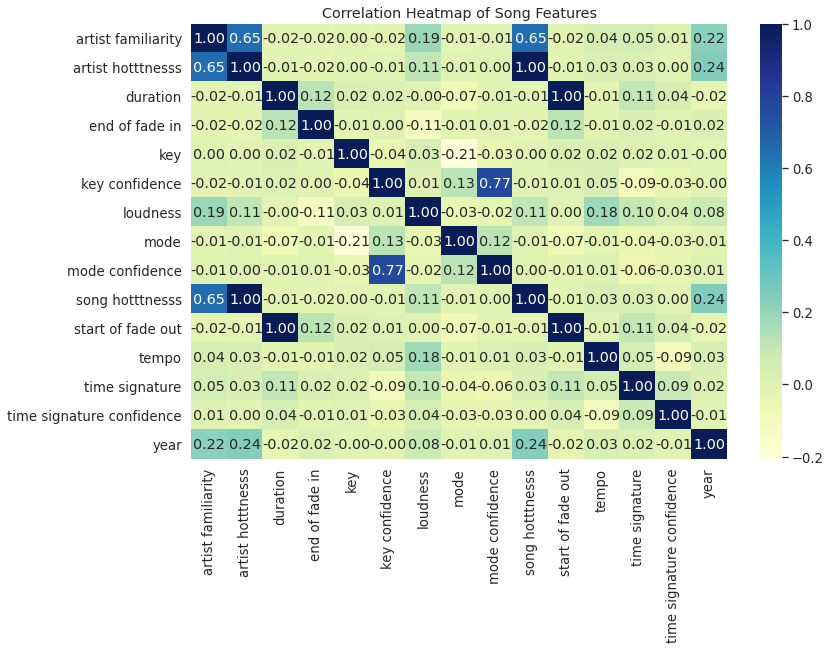

In [25]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(12,8))
ax = sns.heatmap(data_num.corr(), 
                 xticklabels=True, 
                 yticklabels=True, 
                 cmap="YlGnBu",
                 annot=True, fmt=".2f")
# ax.set_xticks(data_num.columns)
ax.set_title('Correlation Heatmap of Song Features')